## <b> [3단계] AI 모델링
---

## 1, 2 단계에서 진행하신 내용을 아래에 그대로 진행해주세요.

---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [1]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

In [3]:
#Tensorflow 설치하기
from sklearn.impute import KNNImputer

* 데이터 프레임 관련 라이브러리

In [4]:
#라이브러리 불러오기
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


### **나.  학습데이터 불러오기**

In [5]:
path = 'train_dataset.csv'
data_train = pd.read_csv(path)
data_train.head()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


In [6]:
path = 'test_dataset_v01.csv'
df_test = pd.read_csv(path)
df_test

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet')
0,0,97,0,80.0,17.0,17.0,4,0,0,0,...,0,5.0,0,0,12,1,1,1.0,3.0,0
1,1,37,0,22.0,15.0,15.0,3,1,0,0,...,1,NaN,0,0,158,1,1,NaN,NaN,0
2,2,44,0,NaN,20.0,20.0,3,3,0,0,...,0,6.0,3,3,34,1,1,0.0,136.0,0
3,3,40,0,14.0,26.0,26.0,2,0,0,0,...,0,NaN,0,0,29,1,1,1.0,2.0,0
4,4,43,2,NaN,26.0,26.0,2,0,0,0,...,0,NaN,0,0,41,1,1,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,2436,63,0,NaN,17.0,NaN,4,2,0,0,...,1,18.0,0,0,79,1,1,1.0,119.0,0
2437,2437,36,0,1.0,35.0,35.0,2,0,0,0,...,0,27.0,0,0,57,1,1,1.0,NaN,0
2438,2438,45,1,23.0,22.0,NaN,2,0,0,0,...,0,8.0,0,0,199,1,1,2.0,NaN,0
2439,2439,24,0,10.0,14.0,NaN,3,0,0,0,...,0,3.0,0,0,90,1,1,2.0,25.0,0


In [7]:
del_c = ['Unnamed: 0', 'url_chinese_present',"html_num_tags('applet')", 'url_domain_len']

df_test.drop(columns = del_c, axis = 1 , inplace = True)

df_test

,url_len,url_num_hyphens_dom,url_path_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a')
0,97,0,80.0,17.0,4,0,0,0,0,4.844913,0,0,5.0,0,0,12,1,1,1.0,3.0
1,37,0,22.0,15.0,3,1,0,0,0,4.246157,0,1,NaN,0,0,158,1,1,NaN,NaN
2,44,0,NaN,20.0,3,3,0,0,0,4.612835,0,0,6.0,3,3,34,1,1,0.0,136.0
3,40,0,14.0,26.0,2,0,0,0,0,4.238521,0,0,NaN,0,0,29,1,1,1.0,2.0
4,43,2,NaN,26.0,2,0,0,0,0,4.240669,0,0,NaN,0,0,41,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,63,0,NaN,NaN,4,2,0,0,0,4.738082,0,1,18.0,0,0,79,1,1,1.0,119.0
2437,36,0,1.0,35.0,2,0,0,0,0,4.080351,0,0,27.0,0,0,57,1,1,1.0,NaN
2438,45,1,23.0,NaN,2,0,0,0,0,4.359443,0,0,8.0,0,0,199,1,1,2.0,NaN
2439,24,0,10.0,NaN,3,0,0,0,1,4.260333,0,0,3.0,0,0,90,1,1,2.0,25.0


In [8]:
df_test.isna().sum()

url_len                      0
url_num_hyphens_dom          0
url_path_len               466
url_hostname_len           463
url_num_dots                 0
url_num_underscores          0
url_query_len                0
url_num_query_para           0
url_ip_present               0
url_entropy                  0
url_port                     0
html_num_tags('iframe')      0
html_num_tags('script')    467
html_num_tags('embed')       0
html_num_tags('object')      0
html_num_tags('div')         0
html_num_tags('head')        0
html_num_tags('body')        0
html_num_tags('form')      467
html_num_tags('a')         461
dtype: int64

In [9]:
# 결측치 채우기 

imputer = KNNImputer(n_neighbors=2)

df_test = imputer.fit_transform(df_test)
df_test = pd.DataFrame(df_test)
# df_test.isna().sum()
df_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,97.0,0.0,80.0,17.0,4.0,0.0,0.0,0.0,0.0,4.844913,0.0,0.0,5.0,0.0,0.0,12.0,1.0,1.0,1.0,3.0
1,37.0,0.0,22.0,15.0,3.0,1.0,0.0,0.0,0.0,4.246157,0.0,1.0,39.0,0.0,0.0,158.0,1.0,1.0,2.0,308.0
2,44.0,0.0,25.0,20.0,3.0,3.0,0.0,0.0,0.0,4.612835,0.0,0.0,6.0,3.0,3.0,34.0,1.0,1.0,0.0,136.0
3,40.0,0.0,14.0,26.0,2.0,0.0,0.0,0.0,0.0,4.238521,0.0,0.0,2.0,0.0,0.0,29.0,1.0,1.0,1.0,2.0
4,43.0,2.0,17.0,26.0,2.0,0.0,0.0,0.0,0.0,4.240669,0.0,0.0,2.0,0.0,0.0,41.0,1.0,1.0,1.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,63.0,0.0,30.5,42.5,4.0,2.0,0.0,0.0,0.0,4.738082,0.0,1.0,18.0,0.0,0.0,79.0,1.0,1.0,1.0,119.0
2437,36.0,0.0,1.0,35.0,2.0,0.0,0.0,0.0,0.0,4.080351,0.0,0.0,27.0,0.0,0.0,57.0,1.0,1.0,1.0,80.5
2438,45.0,1.0,23.0,19.0,2.0,0.0,0.0,0.0,0.0,4.359443,0.0,0.0,8.0,0.0,0.0,199.0,1.0,1.0,2.0,88.5
2439,24.0,0.0,10.0,15.5,3.0,0.0,0.0,0.0,1.0,4.260333,0.0,0.0,3.0,0.0,0.0,90.0,1.0,1.0,2.0,25.0


In [10]:
df_test = df_test.rename(columns ={0 : 'url_len', 
                                   1: 'url_num_hyphens_dom',
                                   2: 'url_path_len',
                                   3: 'url_hostname_len',
                                   4: 'url_num_dots',
                                   5: 'url_num_underscores',
                                   6 : 'url_query_len',
                                   7 : 'url_num_query_para',
                                   8 : 'url_ip_present',
                                   9 : 'url_entropy',
                                   10 :'url_port',
                                   11 : "html_num_tags('iframe')",
                                   12 : "tml_num_tags('script')",
                                   13 :"html_num_tags('embed')",
                                   14 : "html_num_tags('object')",
                                   15 : "html_num_tags('div')",
                                   16 : "html_num_tags('head')",
                                   17 : "html_num_tags('body')",
                                   18 : "html_num_tags('form')",
                                   19 : "html_num_tags('a')"})

df_test

,url_len,url_num_hyphens_dom,url_path_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_port,html_num_tags('iframe'),tml_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a')
0,97.0,0.0,80.0,17.0,4.0,0.0,0.0,0.0,0.0,4.844913,0.0,0.0,5.0,0.0,0.0,12.0,1.0,1.0,1.0,3.0
1,37.0,0.0,22.0,15.0,3.0,1.0,0.0,0.0,0.0,4.246157,0.0,1.0,39.0,0.0,0.0,158.0,1.0,1.0,2.0,308.0
2,44.0,0.0,25.0,20.0,3.0,3.0,0.0,0.0,0.0,4.612835,0.0,0.0,6.0,3.0,3.0,34.0,1.0,1.0,0.0,136.0
3,40.0,0.0,14.0,26.0,2.0,0.0,0.0,0.0,0.0,4.238521,0.0,0.0,2.0,0.0,0.0,29.0,1.0,1.0,1.0,2.0
4,43.0,2.0,17.0,26.0,2.0,0.0,0.0,0.0,0.0,4.240669,0.0,0.0,2.0,0.0,0.0,41.0,1.0,1.0,1.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,63.0,0.0,30.5,42.5,4.0,2.0,0.0,0.0,0.0,4.738082,0.0,1.0,18.0,0.0,0.0,79.0,1.0,1.0,1.0,119.0
2437,36.0,0.0,1.0,35.0,2.0,0.0,0.0,0.0,0.0,4.080351,0.0,0.0,27.0,0.0,0.0,57.0,1.0,1.0,1.0,80.5
2438,45.0,1.0,23.0,19.0,2.0,0.0,0.0,0.0,0.0,4.359443,0.0,0.0,8.0,0.0,0.0,199.0,1.0,1.0,2.0,88.5
2439,24.0,0.0,10.0,15.5,3.0,0.0,0.0,0.0,1.0,4.260333,0.0,0.0,3.0,0.0,0.0,90.0,1.0,1.0,2.0,25.0


### **다.  데이터 전처리**

In [11]:
# 중복 데이터와 값이 0인 데이터를 제거

del_c = ['Unnamed: 0', 'url_chinese_present',"html_num_tags('applet')", 'url_domain_len']

data_train.drop(columns = del_c , axis = 1, inplace = True)
data_train

,url_len,url_num_hyphens_dom,url_path_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1
0,23.0,0.0,8.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,...,0.0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,malicious
1,75.0,0.0,58.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,...,0.0,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,benign
2,20.0,0.0,4.0,16.0,2.0,0.0,0.0,0.0,0.0,3.708966,...,1.0,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,benign
3,27.0,0.0,13.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,...,0.0,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,benign
4,39.0,2.0,12.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,...,0.0,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,68.0,3.0,16.0,52.0,2.0,0.0,0.0,0.0,0.0,4.135356,...,0.0,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,malicious
3660,66.0,0.0,48.0,18.0,2.0,0.0,0.0,0.0,0.0,4.362331,...,1.0,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0,benign
3661,90.0,1.0,64.0,26.0,4.0,0.0,0.0,0.0,0.0,4.693343,...,0.0,13.0,0.0,0.0,75.0,1.0,1.0,2.0,103.0,malicious
3662,46.0,0.0,33.0,13.0,3.0,0.0,0.0,0.0,0.0,4.604166,...,0.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0,benign


In [12]:
data_train['Result_v1'] = data_train['Result_v1'].map({'malicious': -1, 'benign' : 1})
data_train

,url_len,url_num_hyphens_dom,url_path_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1
0,23.0,0.0,8.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,...,0.0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1
1,75.0,0.0,58.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,...,0.0,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,1
2,20.0,0.0,4.0,16.0,2.0,0.0,0.0,0.0,0.0,3.708966,...,1.0,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,1
3,27.0,0.0,13.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,...,0.0,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,1
4,39.0,2.0,12.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,...,0.0,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,68.0,3.0,16.0,52.0,2.0,0.0,0.0,0.0,0.0,4.135356,...,0.0,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,-1
3660,66.0,0.0,48.0,18.0,2.0,0.0,0.0,0.0,0.0,4.362331,...,1.0,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0,1
3661,90.0,1.0,64.0,26.0,4.0,0.0,0.0,0.0,0.0,4.693343,...,0.0,13.0,0.0,0.0,75.0,1.0,1.0,2.0,103.0,-1
3662,46.0,0.0,33.0,13.0,3.0,0.0,0.0,0.0,0.0,4.604166,...,0.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0,1


In [13]:
data_train.dropna(axis = 0, inplace = True)
data_train.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
Result_v1                  0
dtype: int64

## x,y 나누기

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool ,cv

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import *

In [15]:
target = 'Result_v1'

x = data_train.drop(columns = target, axis = 1)
y = data_train[target]

print(x.shape)
print(y.shape)

(3663, 20)
(3663,)


In [16]:
# train_test_split 사용
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size= 0.2, random_state= 2022)

In [17]:
#트리구조를 써야함으로 정규화
x = (x - x.min()) / (x.max() - x.min())
x

,url_len,url_num_hyphens_dom,url_path_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a')
0,0.009285,0.000000,0.004405,0.104762,0.032258,0.0,0.0,0.0,0.0,0.493684,0.0,0.000000,0.026217,0.0,0.0,0.000000,0.333333,0.333333,0.000000,0.000000
1,0.037684,0.000000,0.031938,0.123810,0.161290,0.0,0.0,0.0,0.0,0.615533,0.0,0.000000,0.067416,0.0,0.0,0.001003,0.333333,0.333333,0.000000,0.001561
2,0.007646,0.000000,0.002203,0.114286,0.032258,0.0,0.0,0.0,0.0,0.314898,0.0,0.038462,0.123596,0.0,0.0,0.005065,0.333333,0.333333,0.052632,0.005204
3,0.011469,0.000000,0.007159,0.095238,0.064516,0.0,0.0,0.0,0.0,0.417567,0.0,0.000000,0.056180,0.0,0.0,0.007572,0.333333,0.333333,0.017544,0.004089
4,0.018023,0.142857,0.006608,0.219048,0.032258,0.0,0.0,0.0,0.0,0.614147,0.0,0.000000,0.037453,0.0,0.0,0.016649,0.333333,0.333333,0.000000,0.023864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,0.033861,0.214286,0.008811,0.457143,0.032258,0.0,0.0,0.0,0.0,0.453159,0.0,0.000000,0.000000,0.0,0.0,0.000552,0.333333,0.333333,0.000000,0.000223
3660,0.032769,0.000000,0.026432,0.133333,0.032258,0.0,0.0,0.0,0.0,0.526758,0.0,0.038462,0.052434,0.0,0.0,0.010631,0.333333,0.333333,0.052632,0.035313
3661,0.045877,0.071429,0.035242,0.209524,0.096774,0.0,0.0,0.0,0.0,0.634092,0.0,0.000000,0.048689,0.0,0.0,0.003761,0.333333,0.333333,0.035088,0.007657
3662,0.021846,0.000000,0.018172,0.085714,0.064516,0.0,0.0,0.0,0.0,0.605175,0.0,0.000000,0.000000,0.0,0.0,0.000201,0.333333,0.333333,0.000000,0.000223


### **마. Confusion Matrix 함수 정의**


#### Confusion Matrix란 Training 을 통한 Prediction 성능을 측정하기 위해 예측 value와 실제 value를 비교하기 위한 표입니다.
#### 아래 함수는 이번 과제에서 confusion matrix 결과를 보기 쉽게 표현한 것으로 사용 예를 참고하여 모델 결과 확인에 사용하시기 바랍니다.



**<span style="color:green">[참고링크] 공식 Document**</span>
 
* confusion matrix(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [18]:
from sklearn.metrics import classification_report as creport
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [19]:
def plot_confusion_matrix(ax, matrix, labels = ['malicious','benign'], title='Confusion matrix', fontsize=9):
    ax.set_xticks([x for x in range(len(labels))])
    ax.set_yticks([y for y in range(len(labels))])

    # Place labels on minor ticks
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_xticklabels(labels, rotation='90', fontsize=fontsize, minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    # Hide major tick labels
    ax.tick_params(which='major', labelbottom='off', labelleft='off')

    # Finally, hide minor tick marks
    ax.tick_params(which='minor', width=0)

    # Plot heat map
    proportions = [1. * row / sum(row) for row in matrix]
    ax.pcolor(np.array(proportions[::-1]), cmap=plt.cm.Blues)

    # Plot counts as text
    for row in range(len(matrix)):
        for col in range(len(matrix[row])):
            confusion = matrix[::-1][row][col]
            if confusion != 0:
                ax.text(col + 0.5, row + 0.5, int(confusion),
                        fontsize=fontsize,
                        horizontalalignment='center',
                        verticalalignment='center')

    # Add finishing touches
    ax.grid(True, linestyle=':')
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('prediction', fontsize=fontsize)
    ax.set_ylabel('actual', fontsize=fontsize)

    plt.show()

### <span style="color:blue">[예시] Confusion Matrix 사용 방법<span>

- 샘플
#### > confusion = confusion_matrix(test_y, dt_pred)
#### > fig, ax = plt.subplots(figsize=(10,3))
#### > plot_confusion_matrix(ax, confusion, fontsize=30)


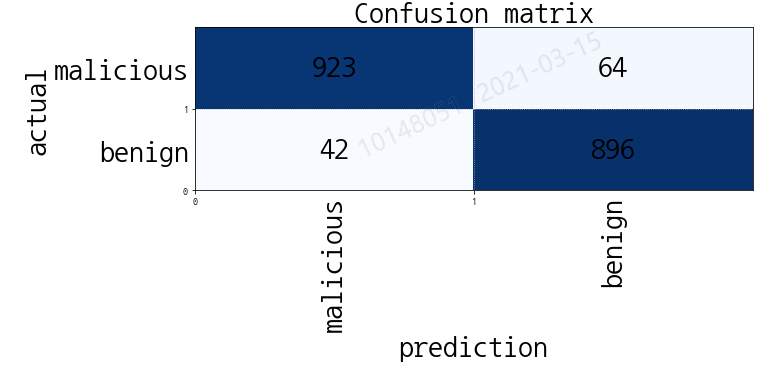

---

## <b> Q. AI 분류 모델 만들기

* 전처리한 데이터셋을 활용해 악성사이트 여부를 판별하는 AI 분류 모델을 <font color="red">최소 3개 이상 </font>만들어보세요.

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool ,cv

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import *

## KNeighborsClassifier

In [21]:
model_kn = KNeighborsClassifier()

cv_score = cross_val_score(model_kn, x_train, y_train, cv = 10)

print(cv_score)
print(cv_score.mean())

result = {}
result['KNN'] = cv_score.mean()

[0.87372014 0.8668942  0.90784983 0.82935154 0.88395904 0.88395904
 0.89419795 0.83276451 0.8668942  0.85324232]
0.869283276450512


## DST

In [22]:
model_dt = DecisionTreeClassifier(random_state = 2022)

cv_score = cross_val_score(model_dt, x_train, y_train, cv = 10)

print(cv_score)
print(cv_score.mean())

result['TREE'] = cv_score.mean()

[0.93515358 0.94539249 0.93174061 0.94539249 0.9556314  0.94197952
 0.92491468 0.93174061 0.94880546 0.93515358]
0.9395904436860067


## Logistic

In [23]:
model_lo = LogisticRegression(random_state= 2022)

cv_score = cross_val_score(model_lo, x_train, y_train, cv = 10)

print(cv_score)
print(cv_score.mean())

result['LOGISTIC']= cv_score.mean()

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

[0.88395904 0.82935154 0.88054608 0.81228669 0.84641638 0.80887372
 0.82935154 0.80887372 0.86348123 0.84982935]
0.841296928327645


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [24]:
estimators = [('dt', DecisionTreeClassifier()),
              ('knn', make_pipeline(MinMaxScaler(), KNeighborsClassifier())),
              ('lr', LogisticRegression(max_iter=1000))]  ## max_iter 반복을 몇 번 할 것인지

model_st = StackingClassifier(estimators = estimators)

cv_score = cross_val_score(model_st, x_train, y_train, cv = 10)

print(cv_score)
print(cv_score.mean())

result['Stacking'] = cv_score.mean()

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

[0.94197952 0.94197952 0.92832765 0.9556314  0.95904437 0.9556314
 0.93174061 0.93174061 0.94880546 0.91467577]
0.9409556313993175


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## RamdomForest

In [25]:
model_forest = RandomForestClassifier(random_state=2022)

cv_score = cross_val_score(model_forest, x_train, y_train, cv = 10)

print(cv_score)
print(cv_score.mean())

result['RandomForest'] = cv_score.mean()

[0.96928328 0.9556314  0.96245734 0.96587031 0.96928328 0.98634812
 0.94880546 0.94539249 0.97269625 0.96245734]
0.9638225255972696


## LGBMC

In [26]:
model_lg = LGBMClassifier(random_state=2022)

cv_score =  cross_val_score(model_lg, x_train, y_train, cv= 10)

print(cv_score)
print(cv_score.mean())

result['LGB'] = cv_score.mean()

[0.96587031 0.95904437 0.96587031 0.96587031 0.96928328 0.98293515
 0.96245734 0.94880546 0.96587031 0.95221843]
0.9638225255972696


## DecisionTree

In [27]:
result

{'KNN': 0.869283276450512,
 'TREE': 0.9395904436860067,
 'LOGISTIC': 0.841296928327645,
 'Stacking': 0.9409556313993175,
 'RandomForest': 0.9638225255972696,
 'LGB': 0.9638225255972696}

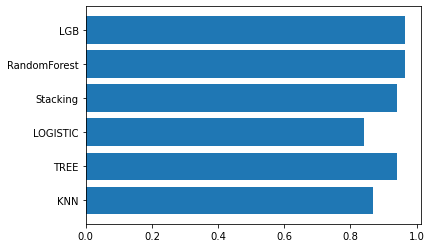

In [28]:
plt.barh(y = list(result), width=result.values())
plt.show()

# 튜닝

## RandomForest

In [29]:
# 랜덤 포레스트
model_forest = RandomForestClassifier()
forest_params = {'max_depth': range(1,51,10), 'min_samples_leaf': range(10, 100, 10)}
model_forest_fi = GridSearchCV(model_forest, forest_params,  cv = 10, verbose =3)
model_forest_fi.fit(x_train,y_train)

Fitting 10 folds for each of 45 candidates, totalling 450 fits
[CV 1/10] END .max_depth=1, min_samples_leaf=10;, score=0.836 total time=   0.1s
[CV 2/10] END .max_depth=1, min_samples_leaf=10;, score=0.840 total time=   0.1s
[CV 3/10] END .max_depth=1, min_samples_leaf=10;, score=0.904 total time=   0.1s
[CV 4/10] END .max_depth=1, min_samples_leaf=10;, score=0.840 total time=   0.1s
[CV 5/10] END .max_depth=1, min_samples_leaf=10;, score=0.904 total time=   0.1s
[CV 6/10] END .max_depth=1, min_samples_leaf=10;, score=0.881 total time=   0.1s
[CV 7/10] END .max_depth=1, min_samples_leaf=10;, score=0.775 total time=   0.2s
[CV 8/10] END .max_depth=1, min_samples_leaf=10;, score=0.867 total time=   0.2s
[CV 9/10] END .max_depth=1, min_samples_leaf=10;, score=0.870 total time=   0.2s
[CV 10/10] END max_depth=1, min_samples_leaf=10;, score=0.870 total time=   0.2s
[CV 1/10] END .max_depth=1, min_samples_leaf=20;, score=0.867 total time=   0.2s
[CV 2/10] END .max_depth=1, min_samples_leaf=2

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 51, 10),
                         'min_samples_leaf': range(10, 100, 10)},
             verbose=3)

In [35]:
#  TREE
model_dt = DecisionTreeClassifier()
params = {'max_depth' : range(1,51), 'min_samples_leaf' : range(10, 100,10)}
model_dt_fi = GridSearchCV(model_dt, params,cv= 10, scoring= 'accuracy')
model_dt_fi.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 51),
                         'min_samples_leaf': range(10, 100, 10)},
             scoring='accuracy')

In [31]:
# lGB

model_lg = LGBMClassifier(n_estimators=200)
evals = [(x_val, y_val)]
model_lg.fit(x_train, y_train, early_stopping_rounds= 100, eval_metric='logloss', eval_set=evals, verbose = True) # 

C:\Users\User\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.622126
[2]	valid_0's binary_logloss: 0.561951
[3]	valid_0's binary_logloss: 0.51288
[4]	valid_0's binary_logloss: 0.471886
[5]	valid_0's binary_logloss: 0.435138
[6]	valid_0's binary_logloss: 0.404532
[7]	valid_0's binary_logloss: 0.377857
[8]	valid_0's binary_logloss: 0.354407
[9]	valid_0's binary_logloss: 0.331576
[10]	valid_0's binary_logloss: 0.313033
[11]	valid_0's binary_logloss: 0.293423
[12]	valid_0's binary_logloss: 0.275668
[13]	valid_0's binary_logloss: 0.259974
[14]	valid_0's binary_logloss: 0.247419
[15]	valid_0's binary_logloss: 0.234247
[16]	valid_0's binary_logloss: 0.223188
[17]	valid_0's binary_logloss: 0.212199
[18]	valid_0's binary_logloss: 0.202259
[19]	valid_0's binary_logloss: 0.193958
[20]	valid_0's binary_logloss: 0.185428
[21]	valid_0's binary_logloss: 0.177805
[22]	valid_0's binary_logloss: 0.171006
[23]	valid_0's binary_logloss: 0.164959
[24]	valid_0's binary_logloss: 0.158581
[25]	valid_0's binary_logloss: 0.153605
[26]	valid

LGBMClassifier(n_estimators=200)

In [58]:
y_pred_rd = model_forest_fi.predict(df_test)
print(model_forest_fi.best_score_)
y_pred_rd


y_pred_lgb = model_lg.predict(df_test)
print(model_lg.best_score_)
print(y_pred_lgb)

y_pred_df = model_dt_fi.predict(df_test)
print(model_dt_fi.best_score_)

0.9426621160409556
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('binary_logloss', 0.09736532436393719)])})
[ 1  1  1 ...  1 -1 -1]
0.9249146757679181


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- tml_num_tags('script')
Feature names seen at fit time, yet now missing:
- html_num_tags('script')

  warnings.warn(message, FutureWarning)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- tml_num_tags('script')
Feature names seen at fit time, yet now missing:
- html_num_tags('script')

  warnings.warn(message, FutureWarning)


## 중요변수도

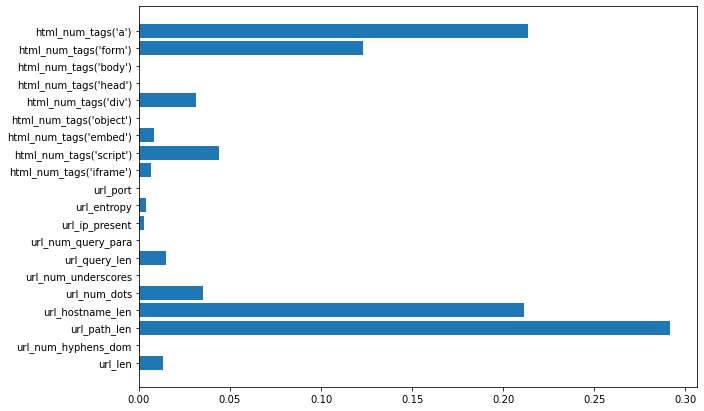

In [39]:
# Feature(특징)별 가중치 확인
plt.figure(figsize = (10,7))
plt.barh(y = list(x), width = model_dt_fi.best_estimator_.feature_importances_)
plt.show()



<BarContainer object of 20 artists>

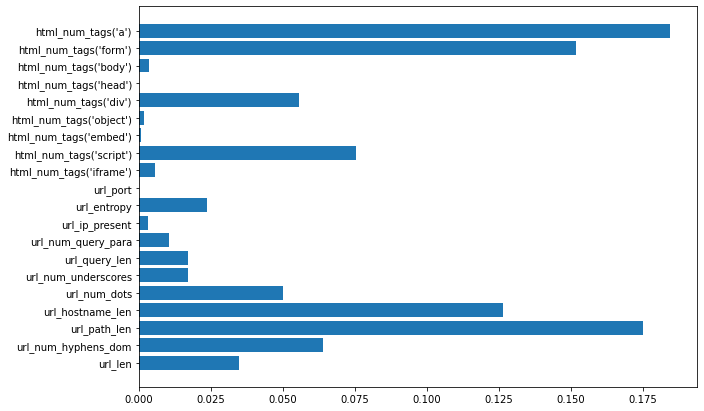

In [40]:
## 포레스트랜덤 중요변수도
plt.figure(figsize = (10,7))
plt.barh(y = list(x), width= model_forest_fi.best_estimator_.feature_importances_)

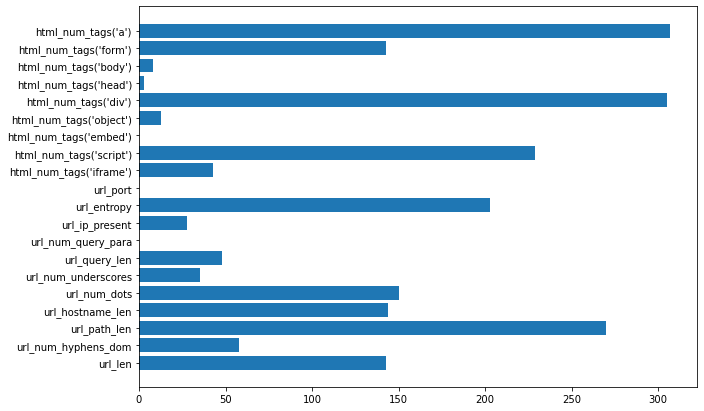

In [42]:
## LGB 중요변수도
plt.figure(figsize = (10,7))
plt.barh(y = list(x), width = model_lg.feature_importances_)
plt.show()

## StackingClassifier

## LGBMClassifier

In [34]:
model_lg = LGBMClassifier(n_estimators=200)

evals = [(x_val, y_val)]
model_lg.fit(x_train, y_train, early_stopping_rounds= 100, eval_metric='logloss', eval_set=evals, verbose = True)

pred_lg = model_lg.predict(x_val)

print(confusion_matrix(y_val, pred_lg))
print(classification_report(y_val, pred_lg))

C:\Users\User\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.62298
[2]	valid_0's binary_logloss: 0.560489
[3]	valid_0's binary_logloss: 0.508386
[4]	valid_0's binary_logloss: 0.466221
[5]	valid_0's binary_logloss: 0.42919
[6]	valid_0's binary_logloss: 0.398225
[7]	valid_0's binary_logloss: 0.369597
[8]	valid_0's binary_logloss: 0.344975
[9]	valid_0's binary_logloss: 0.321685
[10]	valid_0's binary_logloss: 0.302519
[11]	valid_0's binary_logloss: 0.285374
[12]	valid_0's binary_logloss: 0.269977
[13]	valid_0's binary_logloss: 0.256449
[14]	valid_0's binary_logloss: 0.2444
[15]	valid_0's binary_logloss: 0.233192
[16]	valid_0's binary_logloss: 0.223382
[17]	valid_0's binary_logloss: 0.214362
[18]	valid_0's binary_logloss: 0.205782
[19]	valid_0's binary_logloss: 0.197625
[20]	valid_0's binary_logloss: 0.190763
[21]	valid_0's binary_logloss: 0.184853
[22]	valid_0's binary_logloss: 0.178047
[23]	valid_0's binary_logloss: 0.173128
[24]	valid_0's binary_logloss: 0.168494
[25]	valid_0's binary_logloss: 0.163598
[26]	valid_0'

## Catboost

In [46]:
eval_pool = Pool(x_val, y_val)

In [47]:
model = CatBoostClassifier()

model.fit(x_train , y_train)

Learning rate set to 0.016304
0:	learn: 0.6759449	total: 154ms	remaining: 2m 33s
1:	learn: 0.6565923	total: 161ms	remaining: 1m 20s
2:	learn: 0.6381843	total: 166ms	remaining: 55.1s
3:	learn: 0.6214135	total: 171ms	remaining: 42.5s
4:	learn: 0.6045961	total: 175ms	remaining: 34.8s
5:	learn: 0.5880590	total: 178ms	remaining: 29.5s
6:	learn: 0.5762004	total: 182ms	remaining: 25.8s
7:	learn: 0.5638647	total: 185ms	remaining: 23s
8:	learn: 0.5528912	total: 189ms	remaining: 20.8s
9:	learn: 0.5392248	total: 192ms	remaining: 19s
10:	learn: 0.5291367	total: 195ms	remaining: 17.5s
11:	learn: 0.5151373	total: 198ms	remaining: 16.3s
12:	learn: 0.5030004	total: 201ms	remaining: 15.3s
13:	learn: 0.4920208	total: 205ms	remaining: 14.5s
14:	learn: 0.4817022	total: 209ms	remaining: 13.7s
15:	learn: 0.4729341	total: 212ms	remaining: 13s
16:	learn: 0.4645050	total: 215ms	remaining: 12.4s
17:	learn: 0.4546387	total: 220ms	remaining: 12s
18:	learn: 0.4459768	total: 223ms	remaining: 11.5s
19:	learn: 0.4377

In [48]:
y_pred6 = model.predict(x_val)

In [49]:
print(confusion_matrix(y_val, y_pred6))
print(classification_report(y_val, y_pred6))
print(model.best_score_)

[[356  12]
 [ 16 349]]
              precision    recall  f1-score   support

          -1       0.96      0.97      0.96       368
           1       0.97      0.96      0.96       365

    accuracy                           0.96       733
   macro avg       0.96      0.96      0.96       733
weighted avg       0.96      0.96      0.96       733

{'learn': {'Logloss': 0.04795230079836406}}


In [51]:
sub = pd.read_csv('sample_submission.csv')

In [52]:
# LGB

sub['expected'] = y_pred_lgb

In [55]:
sub.to_csv('d026203_최현우.csv', index = False)

In [57]:
# 랜덤 포레스트

sub['expected'] = y_pred_rd

sub.to_csv('d026203(random)_최현우.csv', index = False)

In [59]:
sub['expected'] = y_pred_df

sub.to_csv('d026203(tree)_최현우.csv', index = False)